In [1]:
# Convolutional Neural Network

# Installing Theano
# pip install --upgrade --no-deps git+git://github.com/Theano/Theano.git

# Installing Tensorflow
# Install Tensorflow from the website: https://www.tensorflow.org/versions/r0.12/get_started/os_setup.html

# Installing Keras
# pip install --upgrade keras

# Part 1 - Building the CNN

# Importing the Keras libraries and packages
import numpy as np
import os
import keras_metrics
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import TimeDistributed
from keras.layers import LSTM
from keras.layers import Reshape

import warnings
warnings.filterwarnings('ignore')

# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Convolution2D(64, (3, 3), padding = 'same', input_shape = (128, 128, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Convolution2D(64, (3, 3), padding = 'same', activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a third conolutional layer
classifier.add(Convolution2D(64, (3, 3), padding = 'same', activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())
classifier.add(Dropout(rate = 0.5))

# Step 4 - Full connection
classifier.add(Reshape((4*4, 1024)))
classifier.add(LSTM(units = 50, return_sequences = True, dropout = 0.5))
classifier.add(LSTM(units = 20, return_sequences = False, dropout = 0.5))
classifier.add(Dense(output_dim = 8, activation = 'softmax'))

classifier.summary()

Z:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 64)      1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 16384)             0         
__________

In [2]:
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy', keras_metrics.precision(), keras_metrics.recall()])

In [3]:
# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   height_shift_range =  0.1,
                                   width_shift_range = 0.1,
                                   channel_shift_range = 10)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('train/',
                                                 target_size = (128, 128),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('test/',
                                            target_size = (128, 128),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 11880 images belonging to 8 classes.
Found 3960 images belonging to 8 classes.


In [4]:
results = classifier.fit_generator(training_set,
                         samples_per_epoch = 11880,
                         nb_epoch = 100,
                         validation_data = test_set,
                         nb_val_samples = 3960)

Epoch 1/100
371/371 [==============================] - 2670s 7s/step - loss: 1.9911 - acc: 0.2082 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 1.8958 - val_acc: 0.2358 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/100
371/371 [==============================] - 2667s 7s/step - loss: 1.8522 - acc: 0.2806 - precision: 0.1188 - recall: 0.0047 - val_loss: 1.6662 - val_acc: 0.3714 - val_precision: 0.6508 - val_recall: 0.0487
Epoch 3/100
371/371 [==============================] - 2658s 7s/step - loss: 1.7524 - acc: 0.3286 - precision: 0.5181 - recall: 0.0386 - val_loss: 1.5928 - val_acc: 0.3996 - val_precision: 0.6663 - val_recall: 0.0897
Epoch 4/100
371/371 [==============================] - 2662s 7s/step - loss: 1.7023 - acc: 0.3507 - precision: 0.5503 - recall: 0.0613 - val_loss: 1.5128 - val_acc: 0.4359 - val_precision: 0.7229 - val_recall: 0.1422
Epoch 5/100
371/371 [==============================] - 2669s 7s/step - loss: 1.6347 - acc: 0.3817 - precision: 0.617

371/371 [==============================] - 2668s 7s/step - loss: 0.7986 - acc: 0.7095 - precision: 0.7929 - recall: 0.6276 - val_loss: 0.4711 - val_acc: 0.8316 - val_precision: 0.8720 - val_recall: 0.7811
Epoch 39/100
371/371 [==============================] - 2672s 7s/step - loss: 0.8031 - acc: 0.7110 - precision: 0.7841 - recall: 0.6258 - val_loss: 0.4444 - val_acc: 0.8505 - val_precision: 0.8976 - val_recall: 0.8058
Epoch 40/100
371/371 [==============================] - 2661s 7s/step - loss: 0.8051 - acc: 0.7106 - precision: 0.7842 - recall: 0.6262 - val_loss: 0.5255 - val_acc: 0.8159 - val_precision: 0.8649 - val_recall: 0.7601
Epoch 41/100
371/371 [==============================] - 2671s 7s/step - loss: 0.7788 - acc: 0.7179 - precision: 0.7920 - recall: 0.6377 - val_loss: 0.4430 - val_acc: 0.8477 - val_precision: 0.8878 - val_recall: 0.7949
Epoch 42/100
371/371 [==============================] - 2674s 7s/step - loss: 0.7719 - acc: 0.7172 - precision: 0.7898 - recall: 0.6386 - val

Epoch 76/100
371/371 [==============================] - 2643s 7s/step - loss: 0.5816 - acc: 0.7969 - precision: 0.8414 - recall: 0.7490 - val_loss: 0.2613 - val_acc: 0.9085 - val_precision: 0.9290 - val_recall: 0.8929
Epoch 77/100
371/371 [==============================] - 2647s 7s/step - loss: 0.5734 - acc: 0.7989 - precision: 0.8429 - recall: 0.7536 - val_loss: 0.2425 - val_acc: 0.9197 - val_precision: 0.9380 - val_recall: 0.9048
Epoch 78/100
371/371 [==============================] - 2649s 7s/step - loss: 0.5573 - acc: 0.8040 - precision: 0.8486 - recall: 0.7580 - val_loss: 0.2166 - val_acc: 0.9280 - val_precision: 0.9434 - val_recall: 0.9134
Epoch 79/100
371/371 [==============================] - 2650s 7s/step - loss: 0.5744 - acc: 0.7993 - precision: 0.8432 - recall: 0.7541 - val_loss: 0.2472 - val_acc: 0.9220 - val_precision: 0.9354 - val_recall: 0.9063
Epoch 80/100
371/371 [==============================] - 2647s 7s/step - loss: 0.5682 - acc: 0.8037 - precision: 0.8400 - recall:

In [5]:
test_steps_per_epoch = np.math.ceil(test_set.samples / test_set.batch_size)
predictions = classifier.predict_generator(test_set, steps=test_steps_per_epoch)
predicted_classes = np.argmax(predictions, axis=1)

In [6]:
true_classes = test_set.classes
class_labels = list(test_set.class_indices.keys())   

In [7]:
import sklearn.metrics as metrics
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report) 

             precision    recall  f1-score   support

      angry       0.13      0.13      0.13       528
       calm       0.13      0.13      0.13       528
    disgust       0.17      0.17      0.17       528
    fearful       0.15      0.14      0.14       528
      happy       0.14      0.15      0.14       528
    neutral       0.09      0.09      0.09       264
        sad       0.13      0.13      0.13       528
  surprised       0.13      0.13      0.13       528

avg / total       0.14      0.14      0.14      3960



Confusion matrix, without normalization
[[70 71 70 58 73 47 72 67]
 [77 69 62 70 74 39 62 75]
 [64 57 91 77 58 25 77 79]
 [60 64 69 74 75 34 72 80]
 [83 67 69 62 77 36 68 66]
 [31 39 29 37 36 24 29 39]
 [61 84 78 65 75 32 68 65]
 [73 70 79 63 75 30 67 71]]


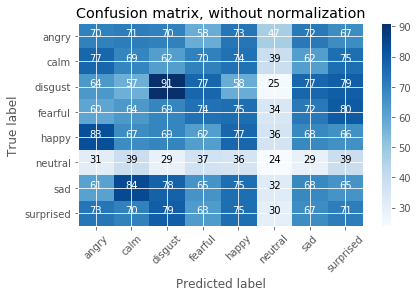

Normalized confusion matrix
[[13.2576 13.447  13.2576 10.9848 13.8258  8.9015 13.6364 12.6894]
 [14.5833 13.0682 11.7424 13.2576 14.0152  7.3864 11.7424 14.2045]
 [12.1212 10.7955 17.2348 14.5833 10.9848  4.7348 14.5833 14.9621]
 [11.3636 12.1212 13.0682 14.0152 14.2045  6.4394 13.6364 15.1515]
 [15.7197 12.6894 13.0682 11.7424 14.5833  6.8182 12.8788 12.5   ]
 [11.7424 14.7727 10.9848 14.0152 13.6364  9.0909 10.9848 14.7727]
 [11.553  15.9091 14.7727 12.3106 14.2045  6.0606 12.8788 12.3106]
 [13.8258 13.2576 14.9621 11.9318 14.2045  5.6818 12.6894 13.447 ]]


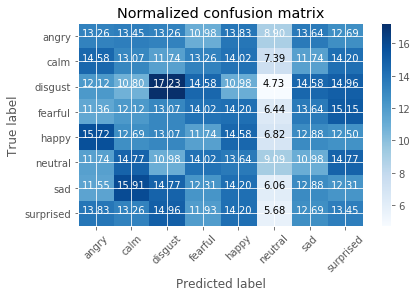

In [10]:
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting normalize=True.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]*100
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap, aspect = 'auto')
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = metrics.confusion_matrix(true_classes, predicted_classes)
np.set_printoptions(precision=4)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_labels,
                      title='Confusion matrix, without normalization')
plt.savefig("non_normalized_confusion_matrix_cnn_lstm.png")
plt.show()
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_labels, normalize=True,
                      title='Normalized confusion matrix')
plt.savefig("normalized_confusion_matrix_cnn_lstm.png")
plt.show()

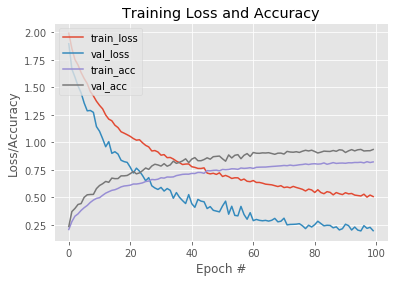

In [11]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.figure()
N = 100
plt.plot(np.arange(0, N), results.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), results.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), results.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), results.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper left")
plt.savefig("plot_cnn_lstm.png")